# Annual Salary Prediction

Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

## Import Libraries

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Import Dataset

In [128]:
df = pd.read_csv("adult.csv")
df[df == '?'] = np.nan
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


## Handle Missing Data

### Examine Features

In [129]:
# Check for features with null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


### Impute Missing Categorical Data with the Mode

In [130]:
# No numerical data has null objects
# 3 categorical data has null objects
# Impute missing categorical data with the mode

for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


## Examine Class

In [131]:
print('<=50: ', round(df['income'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('>50: ', round(df['income'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
print(df['income'].value_counts())

<=50:  75.92 % of the dataset
>50:  24.08 % of the dataset
0    24720
1     7841
Name: income, dtype: int64


## Balance Dataset

In [132]:
# As shown before, the dataset has a skewed distribution of classes
# Balancing needs to be done in order to have a normal distribution of the classes

# Shuffle dataset
df = df.sample(frac=1)

# Separate the classes of <=50k (0) and >50k (1)
# Take a slice of class 0 since there are larger proportions of 0's than 1's 
over_df = df.loc[df['income'] == 1]
under_df = df.loc[df['income'] == 0][:7841]

normal_dist_df = pd.concat([over_df, under_df])

# Shuffle dataframe rows
new_df = normal_dist_df.sample(frac=1, random_state=4)

new_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
17332,34,Private,188096,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,36,United-States,0
25889,27,Local-gov,170504,Bachelors,13,Never-married,Transport-moving,Not-in-family,White,Female,0,0,40,United-States,0
14769,27,Private,347513,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0
17599,56,Self-emp-not-inc,110238,Bachelors,13,Married-spouse-absent,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,1
11325,48,Private,240231,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,40,Japan,1


Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: income, dtype: float64


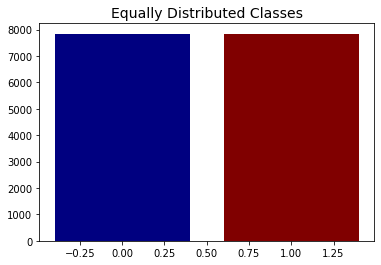

In [133]:
# Distribution plot for new dataframe
print('Distribution of the Classes in the subsample dataset')
counts = new_df['income'].value_counts()
print(counts/len(new_df))

plt.bar(counts.index, counts.values, color=['navy', 'maroon'])
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

## Plot Correlations

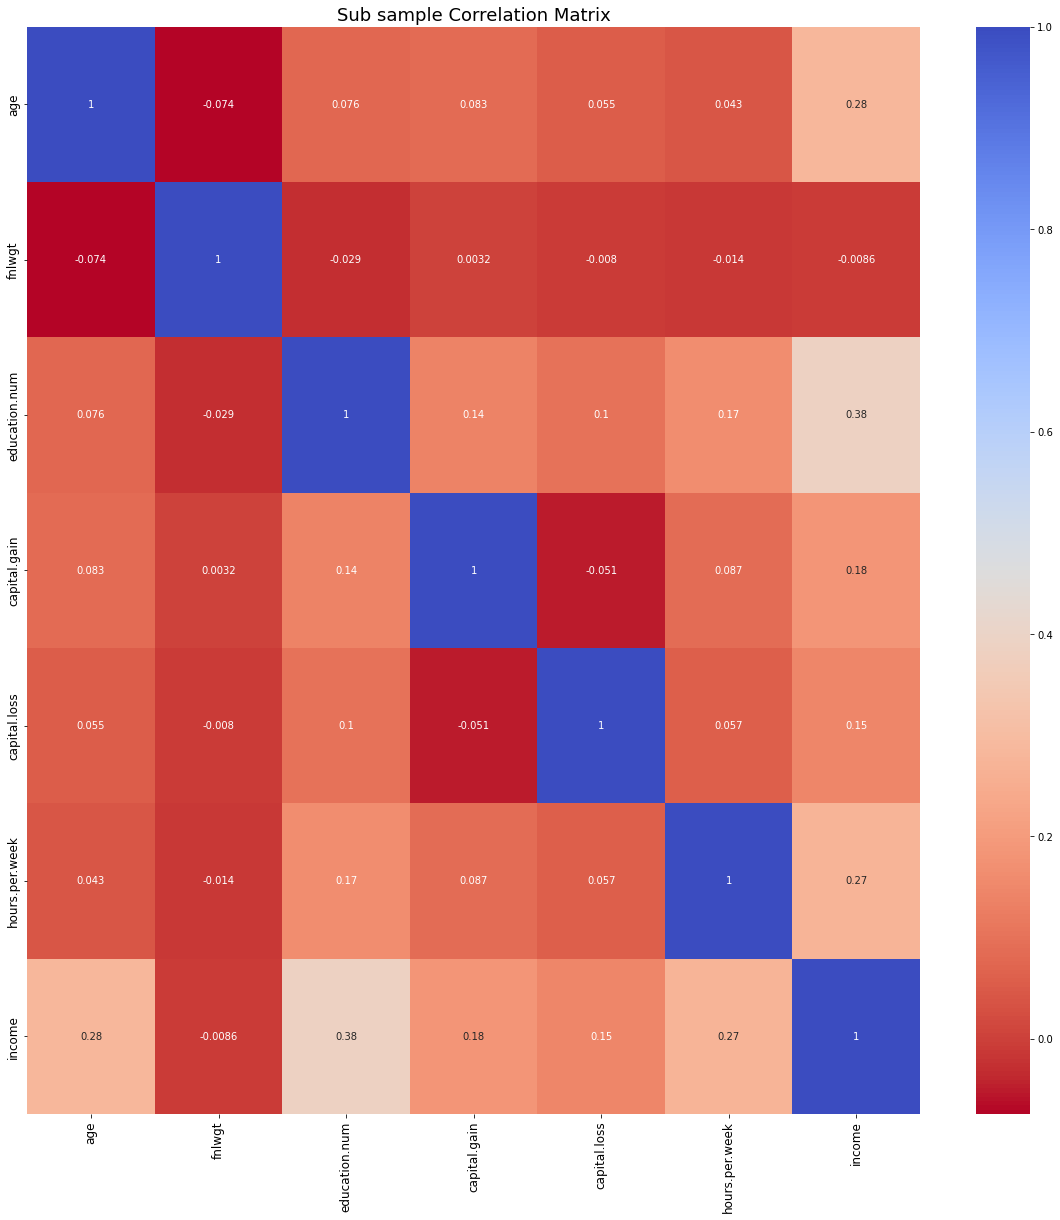

In [134]:
plt.figure(figsize = (20,20))
plt.title("Sub sample Correlation Matrix", fontsize = 18)
sns.heatmap(new_df.corr(numeric_only=True), cmap = 'coolwarm_r', annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12, rotation = 90)
plt.show()

Text(0.5, 1.0, 'Hours-per-week vs Income correlation')

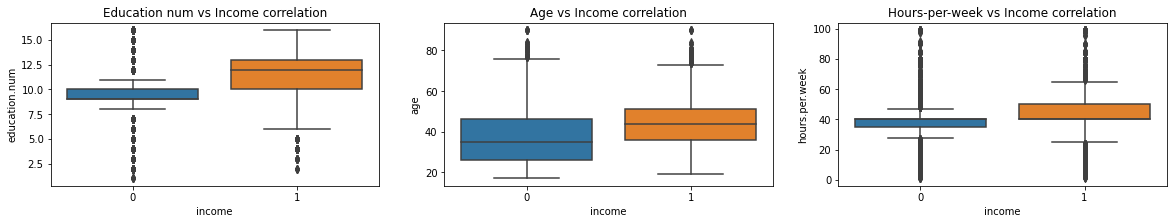

In [135]:
# Top 3 features with the highest correlation to income are education.num, age, and hours.per.week
# Boxplots would help on detecting outliers on these features
f, axes = plt.subplots(ncols=3, figsize=(20,3))

sns.boxplot(x="income", y="education.num", data=new_df, ax=axes[0])
axes[0].set_title('Education num vs Income correlation')

sns.boxplot(x="income", y="age", data=new_df, ax=axes[1])
axes[1].set_title('Age vs Income correlation')

sns.boxplot(x="income", y="hours.per.week", data=new_df, ax=axes[2])
axes[2].set_title('Hours-per-week vs Income correlation')

## Remove Outliers

In [136]:
# Outliers above and below the Interquartile Range (IQR) are abundant, 
# hence outlier removal needs to be done carefully.

# Remove outliers for 'education.num'
education_num_over = new_df['education.num'].loc[new_df['income'] == 1].values
q25, q75 = np.percentile(education_num_over, 25), np.percentile(education_num_over, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
education_num_iqr = q75 - q25
print('iqr: {}'.format(education_num_iqr))

education_num_cut_off = education_num_iqr * 2
education_num_lower, education_num_upper = q25 - education_num_cut_off, q75 + education_num_cut_off
print('Cut Off: {}'.format(education_num_cut_off))
print('education_num Lower: {}'.format(education_num_lower))
print('education_num Upper: {}'.format(education_num_upper))

outliers = [x for x in education_num_over if x < education_num_lower or x > education_num_upper]
print('Feature education num Outliers for over Cases: {}'.format(len(outliers)))
print('Education num outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['education.num'] > education_num_upper) | (new_df['education.num'] < education_num_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: 10.0 | Quartile 75: 13.0
iqr: 3.0
Cut Off: 6.0
education_num Lower: 4.0
education_num Upper: 19.0
Feature education num Outliers for over Cases: 22
Education num outliers:[3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2]
Number of Instances after outliers removal: 15489


In [137]:
# Remove outliers for 'age'
age_over = new_df['age'].loc[new_df['income'] == 1].values
q25, q75 = np.percentile(age_over, 25), np.percentile(age_over, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
age_iqr = q75 - q25
print('iqr: {}'.format(age_iqr))

age_cut_off = age_iqr * 2
age_lower, age_upper = q25 - age_cut_off, q75 + age_cut_off
print('Cut Off: {}'.format(age_cut_off))
print('Age Lower: {}'.format(age_lower))
print('Age Upper: {}'.format(age_upper))

outliers = [x for x in age_over if x < age_lower or x > age_upper]
print('Feature education num Outliers for over Cases: {}'.format(len(outliers)))
print('Education num outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['age'] > age_upper) | (new_df['age'] < age_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: 36.0 | Quartile 75: 51.0
iqr: 15.0
Cut Off: 30.0
Age Lower: 6.0
Age Upper: 81.0
Feature education num Outliers for over Cases: 11
Education num outliers:[90, 83, 83, 90, 90, 90, 90, 84, 90, 90, 90]
Number of Instances after outliers removal: 15460


In [138]:
# Remove outliers for 'hours.per.week'
Hours_per_week_over = new_df['hours.per.week'].loc[new_df['income'] == 1].values
q25, q75 = np.percentile(Hours_per_week_over, 25), np.percentile(Hours_per_week_over, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
Hours_per_week_iqr = q75 - q25
print('iqr: {}'.format(Hours_per_week_iqr))

Hours_per_week_cut_off = Hours_per_week_iqr * 2
Hours_per_week_lower, Hours_per_week_upper = q25 - Hours_per_week_cut_off, q75 + Hours_per_week_cut_off
print('Cut Off: {}'.format(Hours_per_week_cut_off))
print('Hours per week Lower: {}'.format(Hours_per_week_lower))
print('Hours per week Upper: {}'.format(Hours_per_week_upper))

outliers = [x for x in Hours_per_week_over if x < Hours_per_week_lower or x > Hours_per_week_upper]
print('Feature education num Outliers for over Cases: {}'.format(len(outliers)))
print('Education num outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['hours.per.week'] > Hours_per_week_upper) | (new_df['hours.per.week'] < Hours_per_week_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: 40.0 | Quartile 75: 50.0
iqr: 10.0
Cut Off: 20.0
Hours per week Lower: 20.0
Hours per week Upper: 70.0
Feature education num Outliers for over Cases: 284
Education num outliers:[80, 72, 80, 16, 75, 15, 73, 98, 10, 84, 8, 10, 16, 5, 10, 75, 10, 80, 80, 90, 10, 12, 2, 99, 75, 84, 10, 97, 1, 15, 15, 12, 80, 72, 72, 10, 80, 99, 80, 16, 80, 80, 72, 15, 2, 84, 80, 99, 75, 10, 72, 10, 8, 80, 72, 80, 80, 99, 6, 75, 90, 84, 5, 4, 15, 98, 12, 99, 14, 10, 80, 2, 6, 15, 99, 84, 5, 5, 10, 85, 89, 78, 99, 18, 80, 10, 16, 72, 80, 2, 80, 80, 8, 72, 2, 80, 72, 80, 12, 80, 72, 84, 84, 80, 99, 72, 98, 16, 13, 80, 10, 80, 80, 72, 75, 2, 9, 90, 80, 16, 10, 80, 99, 75, 99, 99, 18, 5, 99, 99, 1, 12, 80, 72, 16, 15, 10, 80, 99, 15, 84, 80, 8, 2, 80, 75, 18, 15, 75, 16, 90, 12, 80, 80, 8, 72, 8, 80, 16, 80, 12, 8, 90, 4, 72, 99, 80, 84, 75, 78, 72, 3, 99, 15, 72, 80, 75, 75, 99, 90, 8, 6, 12, 80, 8, 96, 99, 80, 75, 80, 15, 72, 90, 72, 15, 72, 12, 84, 80, 80, 99, 76, 7, 72, 90, 80, 99, 84, 80, 16, 

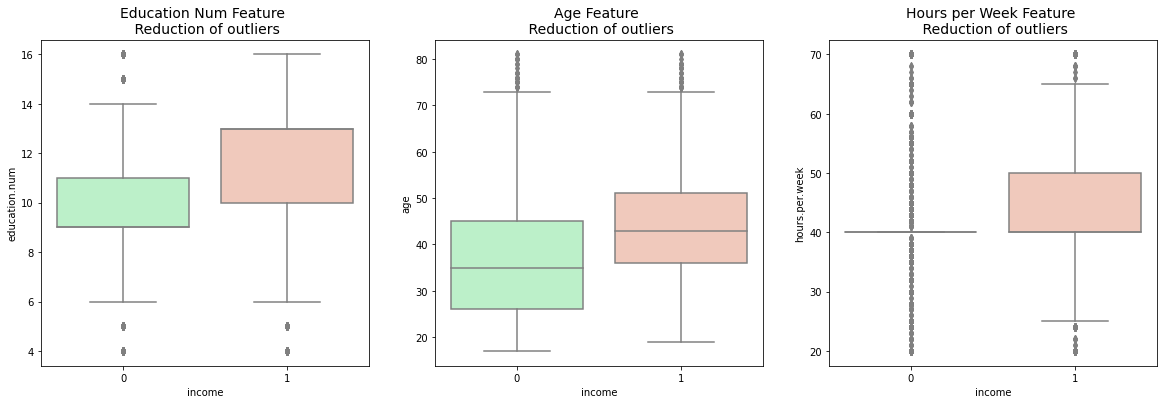

In [139]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature education.num
sns.boxplot(x="income", y="education.num", data=new_df,ax=ax1, palette=colors)
ax1.set_title("Education Num Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature Age
sns.boxplot(x="income", y="age", data=new_df, ax=ax2, palette=colors)
ax2.set_title("Age Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature hours.per.week
sns.boxplot(x="income", y="hours.per.week", data=new_df, ax=ax3, palette=colors)
ax3.set_title("Hours per Week Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

## Split Dependent and Independent Variables

In [140]:
X = new_df.drop(['income'], axis=1)
y = new_df['income']

X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
17332,34,Private,188096,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,36,United-States
25889,27,Local-gov,170504,Bachelors,13,Never-married,Transport-moving,Not-in-family,White,Female,0,0,40,United-States
14769,27,Private,347513,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States
17599,56,Self-emp-not-inc,110238,Bachelors,13,Married-spouse-absent,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States
11325,48,Private,240231,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,40,Japan


## Encode Categorical Data

### Encoding Independent Variables

In [141]:
from sklearn.preprocessing import LabelEncoder

X = pd.get_dummies(X)

In [142]:
# Turn independent varible into numpy array
X = X.values

# Examine shape after encoding
print(X.shape)
print(y.shape)

(14586, 102)
(14586,)


## Split Training Set and Test Set

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(11668, 102) (2918, 102)
(11668,) (2918,)


In [145]:
print(X_train)

[[    34 422836      9 ...      0      0      0]
 [    50 289390      9 ...      1      0      0]
 [    33 198003     10 ...      1      0      0]
 ...
 [    34 287737     10 ...      1      0      0]
 [    27 130438      9 ...      1      0      0]
 [    44 156413     10 ...      1      0      0]]


## Feature Scaling

In [146]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Training Classifier Model on the Training Set

### Hyperparameter Tuning

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_reg_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_

In [148]:
from sklearn.model_selection import cross_val_score
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  81.76%


### Predict with the Best Model

In [149]:
y_pred = log_reg.predict(X_test)

## Evaluating the Prediction

In [150]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef

acc = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
mcc =matthews_corrcoef(y_test,y_pred)

print(f"Accuracy: {acc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Matthews correlation coefficient: {mcc}")

Accuracy: 0.8221384509938314
Precision: 0.8241687979539642
Recall: 0.8408349641226354
F1-Score: 0.8324184694865999
Matthews correlation coefficient: 0.6431199548240234


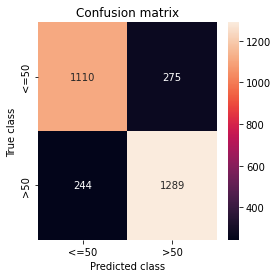

In [151]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
LABELS = ['<=50', '>50']
confusion_mtx = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_mtx, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()